# Analiza podatkov

## Nalaganje podatkov

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")
pd.set_option("display.max_rows", 10)

animeji = pd.read_csv("anime.csv", index_col="anime id")
anime_zvrsti = pd.read_csv("anime_zvrsti.csv", index_col="anime id")
anime_studii = pd.read_csv("anime_studii.csv", index_col="anime id")


## Osnovne tabele za predstavo

In [4]:
animeji.head(10)

,naslov,ocena,tip,število epizod,leto izdaje,število članov
anime id,,,,,,
52991,Sousou no Frieren,9.29,TV,28,2023,1202293
5114,Fullmetal Alchemist: Brotherhood,9.10,TV,64,2009,3564751
9253,Steins;Gate,9.07,TV,24,2011,2728922
38524,Shingeki no Kyojin Season 3 Part 2,9.05,TV,10,2019,2486087
39486,Gintama: The Final,9.05,Movie,1,2021,173489
28977,Gintama°,9.05,TV,51,2015,674457
11061,Hunter x Hunter (2011),9.03,TV,148,2011,3068840
60022,One Piece Fan Letter,9.03,TV Special,1,2024,124289
820,Ginga Eiyuu Densetsu,9.02,OVA,110,1988,349294


In [5]:
anime_zvrsti.head(10)

,zvrst
anime id,
52991,Adventure
52991,Drama
52991,Fantasy
5114,Action
5114,Adventure
5114,Drama
5114,Fantasy
9253,Drama
9253,Sci-Fi


In [6]:
anime_studii.head(10)

,studio
anime id,
52991,Madhouse
5114,Bones
9253,White Fox
38524,Wit Studio
39486,Bandai Namco Pictures
28977,Bandai Namco Pictures
11061,Madhouse
60022,Toei Animation
820,K-Factory


## Analiza
### Št. animejev na leto

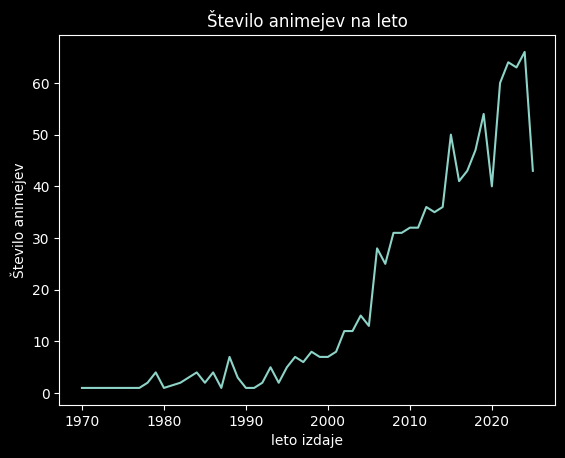

leto izdaje
1970     1
1977     1
1978     2
1979     4
1980     1
        ..
2021    60
2022    64
2023    63
2024    66
2025    43
Name: count, Length: 48, dtype: int64

In [7]:
st_animejev_na_leto = animeji["leto izdaje"].value_counts().sort_index()
st_animejev_na_leto.plot(kind="line")
plt.title("Število animejev na leto")
plt.ylabel("Število animejev")
plt.show()
st_animejev_na_leto

Kot pričakovano jih je čedalje več, največji skok pa se je zgodil med leti 2000 in 2010

### Povprečna ocena animejev po letih

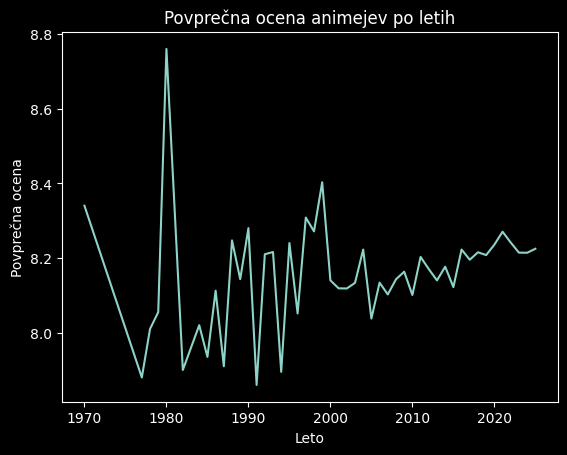

In [8]:
povprecn_ocena_na_leto = animeji.groupby("leto izdaje")["ocena"].mean()
povprecn_ocena_na_leto.plot(kind="line")
plt.title("Povprečna ocena animejev po letih")
plt.xlabel("Leto")
plt.ylabel("Povprečna ocena")
plt.show()

Graf kaže na to da se kvaliteta animeja ne spreminja pretirano skozi zgodovino, saj so razlike v povprečni oceni precej minimalne, je pa res da gledamo let top 1000 animejev z največjimi ocenami. To pa še vedno pomeni da se kvaliteta elite ne spreminja preveč s časom

### Najpogostejše zvrsti

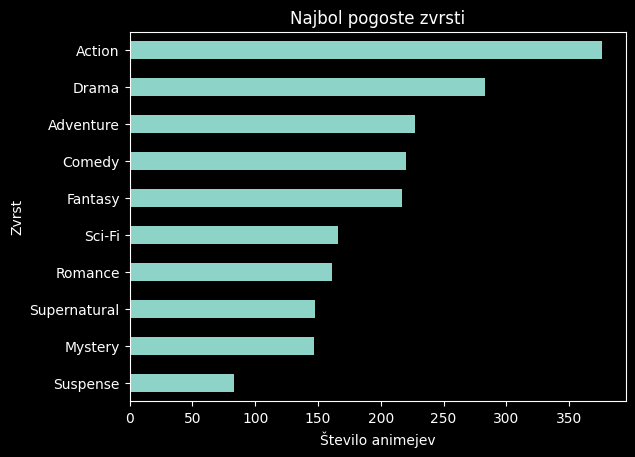

In [9]:
Najpogostejse_zvrsti = anime_zvrsti["zvrst"].value_counts(ascending=False).head(10)
Najpogostejse_zvrsti.plot(kind="barh").invert_yaxis()
plt.title("Najbol pogoste zvrsti")
plt.xlabel("Število animejev")
plt.ylabel("Zvrst")
plt.show()

Akcija kot pričakovano na vrhu, prav tako drama in fantazija saj je večina priljubljenih in splošno znanih animejev ravno teh zvrsti

### Povezava med priljubljenostjo in oceno

__Priljubljenost__ merimo s številom članov, kar na MAL predstavlja vse ljudi ki so ocenili anime ali ga dodali na svoj seznam animejev ki jih trenutno gledajo.
To seveda ni popolno merilo priljubljenosti vendar je najboljši pribljižek ki ga lahko dobimo s podatki na MAL

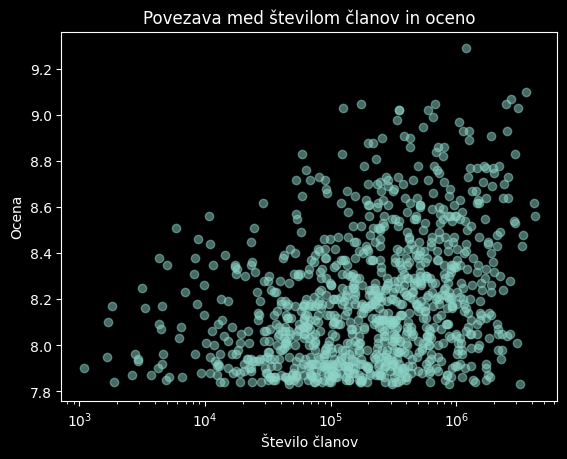

In [10]:
plt.scatter(animeji["število članov"],animeji["ocena"], alpha=0.5)
plt.title("Povezava med številom članov in oceno")
plt.xlabel("Število članov")
plt.ylabel("Ocena")
plt.xscale("log")  # ker so razlike velike
plt.show()

Praznina zgoraj levo namiguje na to da animeji ki niso priljubljeni tudi niso najbolj kvalitetni, za bolj priljubljene pa ni razvidne nobene povezave med oceno in njihovo popularnostjo

### Povezava med dolžino (št epizod) in priljubljenostjo

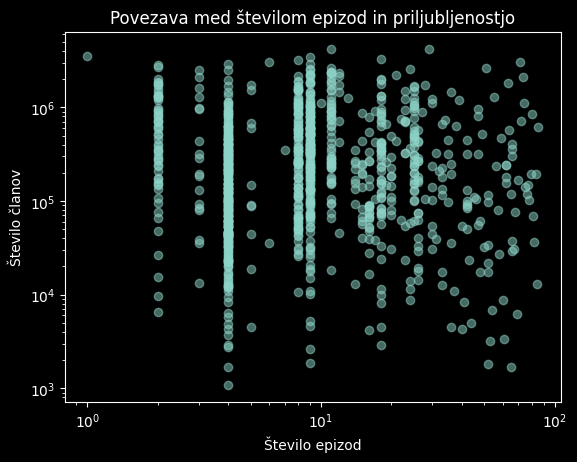

In [11]:
plt.scatter(animeji["število epizod"], animeji["število članov"],alpha=0.5)
plt.xscale("log")  
plt.yscale("log")
plt.title("Povezava med številom epizod in priljubljenostjo")
plt.xlabel("Število epizod")
plt.ylabel("Število članov")
plt.show()

In [12]:
animeji_s_studii = pd.merge(animeji, anime_studii, left_on="anime id", right_on="anime id")

### Studii z največ animeji

In [13]:
st_animejev_po_studiih = animeji_s_studii.groupby("studio").size().sort_values(ascending=False)
st_animejev_po_studiih

studio
Madhouse             60
Production I.G       57
TMS Entertainment    51
Sunrise              44
Bones                41
                     ..
Tokyo Kids            1
Triangle Staff        1
Topcraft              1
Yumeta Company        1
domerica              1
Length: 162, dtype: int64

### Najboljši studii

Studie primerjamo glede na povprečno oceno vseh njihovih animejev. Gledamo le studie ki so naredili vsaj 5 animejev da se izognemo temu da bi bila lestvica zapolnjena s studii ki so naredili le 1 anime z dobro oceno (npr > 8.35)

In [14]:
studii_vsaj5 = st_animejev_po_studiih[st_animejev_po_studiih >= 5].index
studio_povprecje = animeji_s_studii[animeji_s_studii["studio"].isin(studii_vsaj5)].groupby("studio")["ocena"].mean().sort_values(ascending=False)
studio_povprecje.head(10)

studio
Artland                  8.527143
OLM                      8.472857
Bandai Namco Pictures    8.458462
White Fox                8.370000
Kinema Citrus            8.356667
MAPPA                    8.347826
ufotable                 8.344737
Gainax                   8.317143
Science SARU             8.298000
B.CMAY PICTURES          8.284444
Name: ocena, dtype: float64

### Priljubljenost studiev

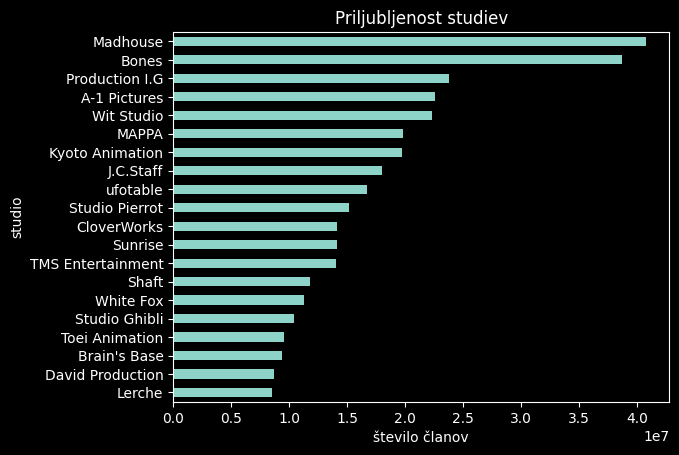

In [21]:
studio_popularnost = animeji_s_studii.groupby("studio")["število članov"].sum().sort_values(ascending=False)
studio_popularnost.head(20).plot(kind="barh").invert_yaxis()
plt.title("Priljubljenost studiev")
plt.xlabel("število članov")
plt.show()


### Število animejev po tipih

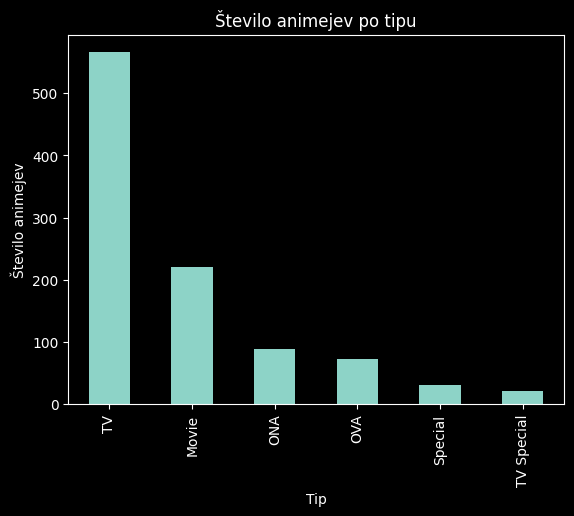

In [16]:
anime_po_tipih = animeji["tip"].value_counts()
anime_po_tipih.plot(kind="bar")
plt.title("Število animejev po tipu")
plt.xlabel("Tip")
plt.ylabel("Število animejev")
plt.show()

- OVA (Original Video Animation) = Anime, ki je narejen izključno za izdajo na video medijih (npr. VHS, DVD, Blu-ray), ne pa za TV ali kino.
- ONA (Original Net Animation) = Anime, ki je ustvarjen izključno za internet (streaming platforme kot so Netflix, Crunchyroll, itd.).
- Special / TV special = Ena ali nekaj epizod, ki niso del običajne serije, pogosto daljše in predvajane kot poseben dogodek.

### Povprečna ocena po tipih

In [17]:
povprecna_ocena_po_tipih = animeji.groupby("tip")["ocena"].mean().sort_values(ascending=False)
povprecna_ocena_po_tipih

tip
TV Special    8.216818
TV            8.211413
Movie         8.190588
ONA           8.161136
Special       8.078065
OVA           8.072361
Name: ocena, dtype: float64

### Priljubljenost po tipih

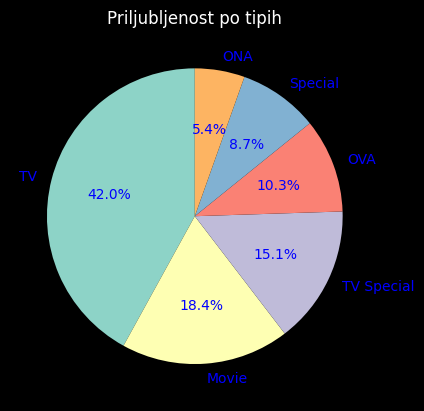

In [22]:
povprecna_popularnost_po_tipih = animeji.groupby("tip")["število članov"].mean().sort_values(ascending=False)
povprecna_popularnost_po_tipih.plot(kind="pie", autopct="%1.1f%%", startangle=90, textprops={"color": "blue"})
plt.title("Priljubljenost po tipih")
plt.ylabel("")
plt.show()

Pričakocano, navadne TV anime serije in filmi so najbolj priljubljeni

### Povprečna ocena zvrsti po desetletjih

<Figure size 1200x600 with 0 Axes>

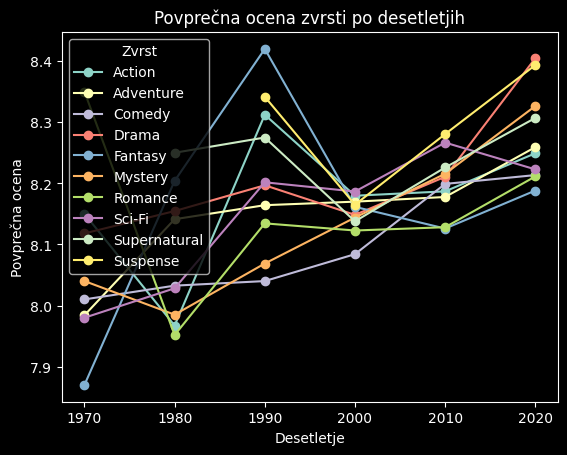

In [23]:
animeji_z_zvrstmi = animeji.merge(anime_zvrsti, left_index=True, right_index=True)

# omejimo na top žanre (spremenjlivka od prej)
omejitev_na_najpogostejse_zvrsti = animeji_z_zvrstmi[animeji_z_zvrstmi["zvrst"].isin(Najpogostejse_zvrsti.index)].copy()
omejitev_na_najpogostejse_zvrsti
omejitev_na_najpogostejse_zvrsti["desetletje"] = (omejitev_na_najpogostejse_zvrsti["leto izdaje"] // 10) * 10
povprecna_ocena_po_desetletjih = omejitev_na_najpogostejse_zvrsti.groupby(["desetletje", "zvrst"])["ocena"].mean().unstack()
plt.figure(figsize=(12,6))
povprecna_ocena_po_desetletjih.plot(kind="line", marker="o")
plt.title("Povprečna ocena zvrsti po desetletjih")
plt.xlabel("Desetletje")
plt.ylabel("Povprečna ocena")
plt.legend(title="Zvrst")
plt.show()

Fantazija, adventura in akcija so bile v 90tih najbolje ocenjene. Adventura se je kar dobro obdržala do danes, ostali sta malo padli. Danes pa so najbolje ocenjene drama, adventura in mystery. Komedija je od 70tih tudi prišla daleč, saj je bila na začetku 9. mestu, sedaj pa je na 4.

### Povprečno število epizod po zvrsteh

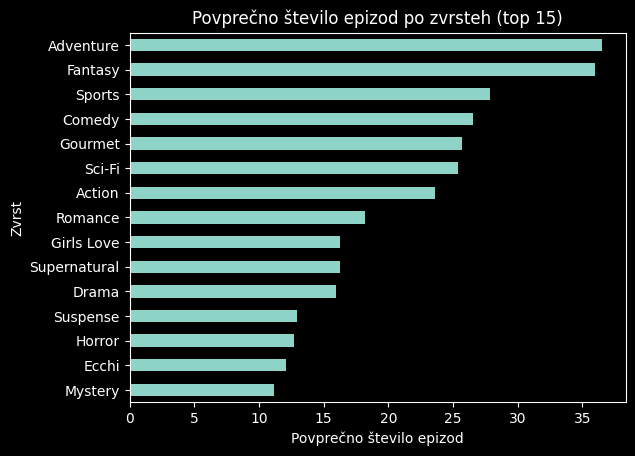

In [24]:
# Pretvorimo stolpec v numeric, vse kar ni številka -> NaN
animeji_z_zvrstmi["število epizod"] = pd.to_numeric(animeji_z_zvrstmi["število epizod"], errors="coerce")

# Izločimo vnose brez znanega števila epizod (NaN)
animeji_z_zvrstmi_stevilke = animeji_z_zvrstmi.dropna(subset=["število epizod"])

# Povprečno število epizod po zvrsteh
povprecne_epizode_po_zvrsti = animeji_z_zvrstmi_stevilke.groupby("zvrst")["število epizod"].mean().sort_values(ascending=False)

povprecne_epizode_po_zvrsti.head(15).plot(kind="barh").invert_yaxis()
plt.title("Povprečno število epizod po zvrsteh (top 15)")
plt.xlabel("Povprečno število epizod")
plt.ylabel("Zvrst")
plt.show()


Smiselno sta adventura in fantazija v povprečju daljša saj je za grajenje sveta potreben čas. Prav tako za športne animeje kjer je pomembna pot likov do prvakov. Presenetljivo pa so dolge tudi komedije. Krajše pa so mystery in horror saj se da dobro zgodbo iz teh zvrsti povedati tudi v dobrih desetih epizodah